In [41]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc,precision_score,recall_score,f1_score

In [42]:
adata = sc.read("/data/mr423/project/data/3-OLINK_data_train_withOutlier_all.h5ad")
adata_test = sc.read("/data/mr423/project/data/3-OLINK_data_test_withOutlier_all.h5ad")

In [43]:
adata.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
2144829,0,1939,1,15,1939-01-15,2007-11-16,68.835044,60-70
3154285,0,1945,1,15,1945-01-15,2007-07-20,62.507871,60-70
1679423,1,1945,11,15,1945-11-15,2009-05-19,63.507187,60-70
1172610,1,1941,12,15,1941-12-15,2009-09-23,67.772758,60-70
4011532,1,1954,1,15,1954-01-15,2009-10-20,55.761807,50-60
...,...,...,...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15,2007-08-14,50.247775,50-60
3378384,0,1950,4,15,1950-04-15,2009-06-27,59.200548,50-60
1220136,0,1945,6,15,1945-06-15,2008-11-11,63.408624,60-70


In [44]:
data = pd.read_csv("/data/mr423/project/data/all_train_binned_data.csv")
data_test = pd.read_csv("/data/mr423/project/data/all_test_binned_data.csv")

In [45]:
data=data.set_index('Id')
data_test=data_test.set_index('Id')

In [46]:
data

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2144829,24,80,14,75,86,90,61,10,99,15,...,39,64,2,91,73,82,32,36,4,75
3154285,42,49,23,58,92,99,82,92,95,27,...,58,17,0,87,87,54,38,42,12,70
1679423,65,92,12,44,83,78,56,0,96,14,...,53,52,5,98,64,54,29,41,2,54
1172610,88,53,29,72,83,58,50,95,99,52,...,45,22,1,90,33,75,27,43,99,74
4011532,75,93,29,45,83,78,75,24,90,44,...,30,42,19,95,92,63,10,38,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137580,72,84,21,57,83,76,78,54,98,31,...,36,32,12,97,84,47,19,30,3,44
3378384,70,12,38,52,95,90,83,60,98,25,...,53,7,17,63,25,69,39,42,60,69
1220136,57,73,52,43,94,92,70,84,99,18,...,39,24,3,95,75,78,17,31,30,68


找出索引的交集和差异

In [47]:
index_data = data.index
index_data_test = data_test.index

common_index = index_data.intersection(index_data_test)
common_index

Index([], dtype='int64', name='Id')

In [48]:
y_target = adata.obs['sex']
y_test = adata_test.obs['sex']

In [49]:
# 分割数据为训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(data, y_target, test_size=0.2,random_state=28)

In [50]:
# model = LogisticRegression(
#         # penalty = None,
#         solver = 'newton-cg',
#         max_iter=1000
# )

model = LogisticRegression(penalty="l1", C=0.1, solver="liblinear")

In [51]:
# model = LogisticRegression(max_iter=1, warm_start=True)  # 使用warm_start=True以便多次调用fit方法

# # 记录每次迭代的损失值
# losses = []

# for i in range(1, 51):  # 假设我们进行100次迭代
#     model.max_iter = i
#     model.fit(X_train, y_train)
#     y_val_pred_proba = model.predict_proba(X_val)
#     loss = log_loss(y_val, y_val_pred_proba)
#     losses.append(loss)

# # 绘制损失值
# plt.plot(range(1, 21), losses, marker='o')
# plt.xlabel('Iteration')
# plt.ylabel('Log Loss')
# plt.title('Log Loss vs. Iteration')
# plt.grid(True)
# plt.show()

In [52]:
# cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# # 打印交叉验证分数
# print(f"交叉验证准确率: {cv_scores}")
# # print(f"平均交叉验证准确率: {cv_scores.mean()}"

In [53]:
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [55]:
# 获取实际收敛的迭代次数
actual_iterations = model.n_iter_[0]

print("实际收敛的迭代次数: ", actual_iterations)

实际收敛的迭代次数:  12


In [56]:
# 获取训练后的权重
weights = model.coef_

print(weights.shape)

# 展示权重矩阵
print("weights after training: ", weights)

# 展平权重矩阵并找出最大值的位置
num_top_weights = 10  # 你想找出的最大值数量
flat_weights = weights.flatten()
top_indices = np.argpartition(flat_weights, -num_top_weights)[-num_top_weights:]
top_indices_sorted = top_indices[np.argsort(-flat_weights[top_indices])]

# 显示最大值及其位置
print("Top {} weight and position:".format(num_top_weights))
for idx in top_indices_sorted:
    position = np.unravel_index(idx, weights.shape)
    print("position: {}, weight: {:.4f}".format(position, flat_weights[idx]))

(1, 2919)
weights after training:  [[ 0.00000000e+00  1.08579973e-04  0.00000000e+00 ...  0.00000000e+00
  -1.45234801e-06  0.00000000e+00]]
Top 10 weight and position:
position: (0, 1894), weight: 0.0749
position: (0, 990), weight: 0.0418
position: (0, 2525), weight: 0.0350
position: (0, 2883), weight: 0.0337
position: (0, 454), weight: 0.0312
position: (0, 904), weight: 0.0266
position: (0, 415), weight: 0.0210
position: (0, 867), weight: 0.0196
position: (0, 1436), weight: 0.0188
position: (0, 2181), weight: 0.0155


In [57]:
data.columns[top_indices_sorted]

Index(['KLK3', 'SPINT3', 'ACRV1', 'EDDM3B', 'PSPN', 'TEX101', 'PROK1', 'SEL1L',
       'FCRLB', 'CDH15'],
      dtype='object')

## 评估模型

### Result for train

In [58]:
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Train Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Train Accuracy: 1.0
Confusion Matrix:
 [[16206     0]
 [    0 13637]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16206
           1       1.00      1.00      1.00     13637

    accuracy                           1.00     29843
   macro avg       1.00      1.00      1.00     29843
weighted avg       1.00      1.00      1.00     29843



### Result for val

In [59]:
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Validation Accuracy: 0.998525666800697
Confusion Matrix:
 [[3992    4]
 [   7 3458]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      3465

    accuracy                           1.00      7461
   macro avg       1.00      1.00      1.00      7461
weighted avg       1.00      1.00      1.00      7461



### Result for test

In [60]:
y_test_pred = model.predict(data_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy}")

print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print(f'accuracy: {accuracy}')


print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9975874547647768
precision: 0.9968960165545784
recall: 0.9979285344381149
f1: 0.9974120082815735
accuracy: 0.9975874547647768
Confusion Matrix:
 [[2208    6]
 [   4 1927]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2214
           1       1.00      1.00      1.00      1931

    accuracy                           1.00      4145
   macro avg       1.00      1.00      1.00      4145
weighted avg       1.00      1.00      1.00      4145



In [33]:
# # 绘制ROC曲线
# y_test_pred_proba = model.predict_proba(data_test)[:, 1]
# fpr, tpr, _ = roc_curve(y_test_pred, y_test_pred_proba)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


Feature 1894    0.073103
Feature 990     0.042478
Feature 2883    0.042088
Feature 1673    0.041809
Feature 2525    0.040700
Feature 2809    0.030516
Feature 454     0.029002
Feature 1260    0.028030
Feature 867     0.026871
Feature 557     0.026866
dtype: float64


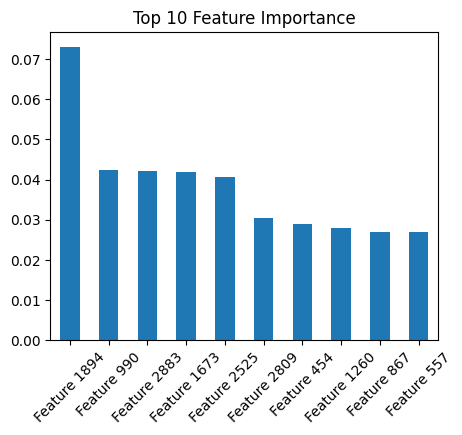

In [34]:
# 特征重要性分析
feature_importance = pd.Series(model.coef_[0], index=[f"Feature {i}" for i in range(data.shape[1])])

# 只显示最重要的10个特征
top_features = feature_importance.abs().sort_values(ascending=False).head(10)
top_features = top_features.sort_values(ascending=False)

print(top_features)

# 可视化特征的重要性
plt.figure(figsize=(5, 4))
top_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance')
plt.show()

In [35]:
top_feature_indices = top_features.index
top_feature_indices = [int(feat.split()[1]) for feat in top_feature_indices]

data.columns[top_feature_indices]

Index(['KLK3', 'SPINT3', 'EDDM3B', 'FSHB', 'ACRV1', 'ENPEP', 'PSPN', 'PZP',
       'SEL1L', 'LEP'],
      dtype='object')

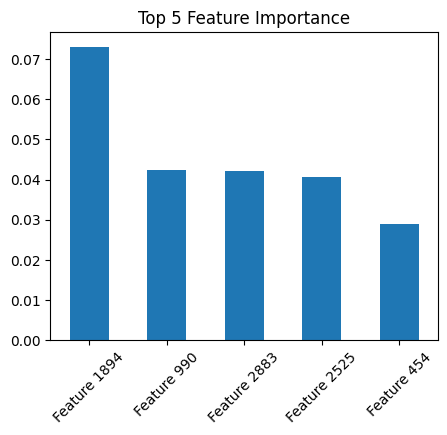

In [36]:
# 找到特征的增加会增加预测为正类的概率的前5个特征
positive_influence_features = feature_importance.sort_values(ascending=False).head(5)


# 可视化特征的重要性
plt.figure(figsize=(5, 4))
positive_influence_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 5 Feature Importance')
plt.show()

In [37]:
positive_influence_features_indices = positive_influence_features.index
positive_influence_features_indices = [int(feat.split()[1]) for feat in positive_influence_features_indices]

data.columns[positive_influence_features_indices]

Index(['KLK3', 'SPINT3', 'EDDM3B', 'ACRV1', 'PSPN'], dtype='object')

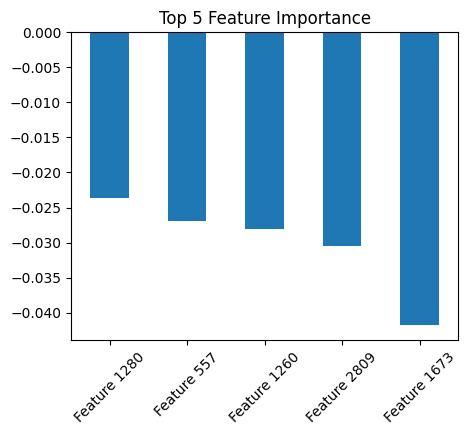

In [38]:
# 找到特征的增加会减少预测为负类的概率的前5个特征
negative_influence_features = feature_importance.sort_values(ascending=False).tail(5)

# 可视化特征的重要性
plt.figure(figsize=(5, 4))
negative_influence_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 5 Feature Importance')
plt.show()

In [39]:
negative_influence_features_indices = negative_influence_features.index
negative_influence_features_indices = [int(feat.split()[1]) for feat in negative_influence_features_indices]

data.columns[negative_influence_features_indices]

Index(['RLN2', 'LEP', 'PZP', 'ENPEP', 'FSHB'], dtype='object')